In [1]:
from skimage import io, color
from skimage.morphology import binary_closing, binary_opening, erosion, dilation
from skimage.morphology import disk
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu, prewitt_h, prewitt_v, prewitt
from skimage import measure
from skimage.color import label2rgb
from skimage import segmentation
from skimage import measure

from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform

from skimage import morphology

import matplotlib.pyplot as plt
import numpy as np

import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance

In [2]:
# Directory containing data and images
in_dir = "data/"

im_name = "pixelwise.png"

im_org = io.imread(in_dir + im_name)

In [3]:
hsv_img = color.rgb2hsv(im_org)
hsv_img = img_as_ubyte(hsv_img)
print(im_org.dtype)

uint8


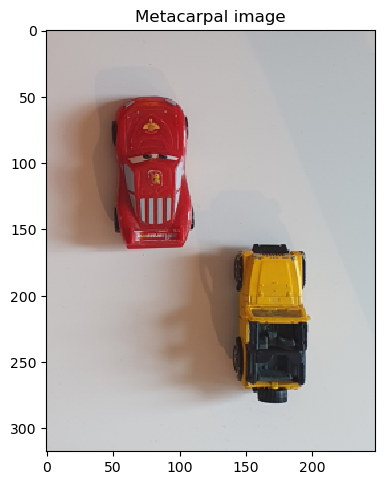

In [4]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

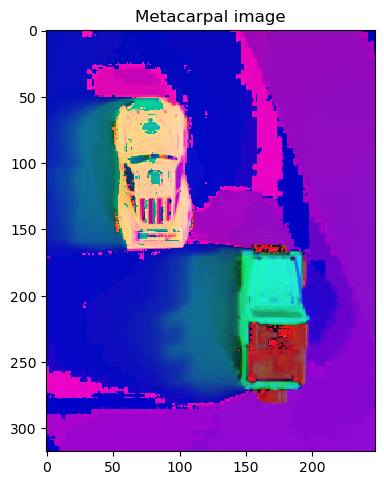

uint8


In [5]:
io.imshow(hsv_img)
plt.title('Metacarpal image')
io.show()
print(hsv_img.dtype)

In [6]:
saturation_value = hsv_img[:,:,1]
print(saturation_value.dtype)

uint8


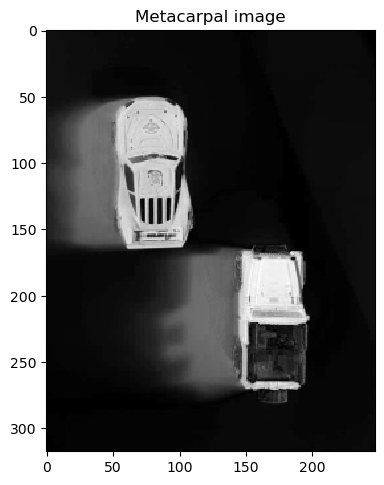

In [7]:
io.imshow(saturation_value)
plt.title('Metacarpal image')
io.show()

In [8]:
def threshold_image(img_in, thres):
    mask = img_in > thres
    return img_as_ubyte(mask)

In [9]:
otsu_threshold = threshold_otsu(saturation_value)
otsu_img = threshold_image(saturation_value, otsu_threshold)
print(otsu_img.dtype)

uint8


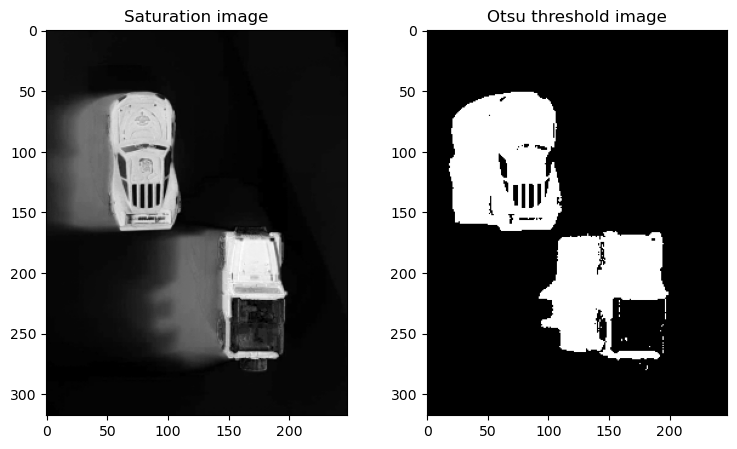

In [10]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (9, 5))
ax[0].imshow(saturation_value, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Saturation image')
ax[1].imshow(otsu_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Otsu threshold image')
plt.show()

In [11]:
eroded = erosion(otsu_img, disk(4))

In [12]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

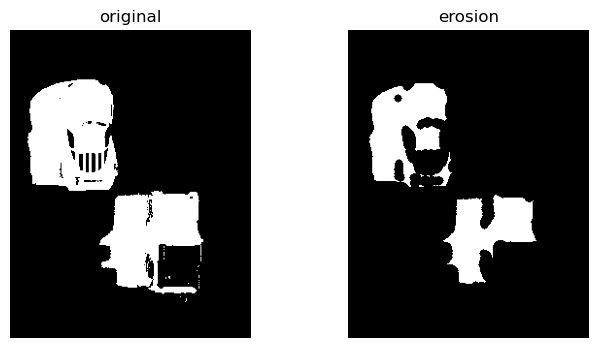

In [13]:
plot_comparison(otsu_img, eroded, 'erosion')

In [14]:
print(np.count_nonzero(eroded))

9906


In [15]:
# Directory containing data and images
in_dir = "data/"

im_name = "figures.png"

im_org = io.imread(in_dir + im_name)

In [16]:
print(im_org.dtype)

uint8


In [17]:
#gray_img = img_as_ubyte(im_org)
gray_img = img_as_ubyte(color.rgb2gray(im_org))

In [18]:
otsu_threshold = threshold_otsu(gray_img)
bin_img = gray_img < otsu_threshold
#otsu_img = threshold_image(gray_img, otsu_threshold)
#print(otsu_img.dtype)

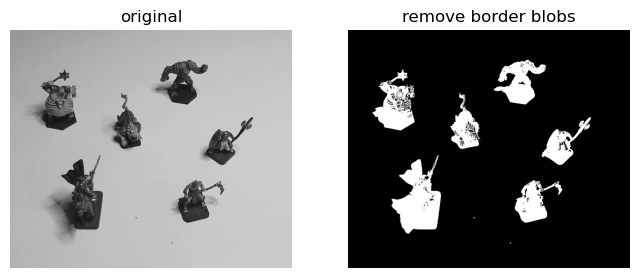

In [19]:
bin_img = segmentation.clear_border(bin_img)
plot_comparison(gray_img, bin_img, "remove border blobs")

In [20]:
print(otsu_threshold)

122


In [21]:
label_img = measure.label(bin_img)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 33


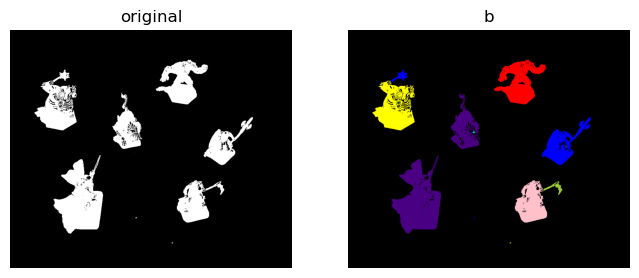

In [22]:
plot_comparison(bin_img, label2rgb(label_img), 'b')

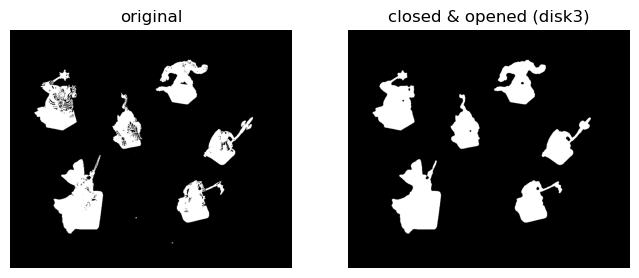

Number of labels: 6


In [23]:
closed = morphology.closing(bin_img, morphology.disk(3))
opened = morphology.opening(closed, morphology.disk(3))
plot_comparison(bin_img, opened, 'closed & opened (disk3)')

label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

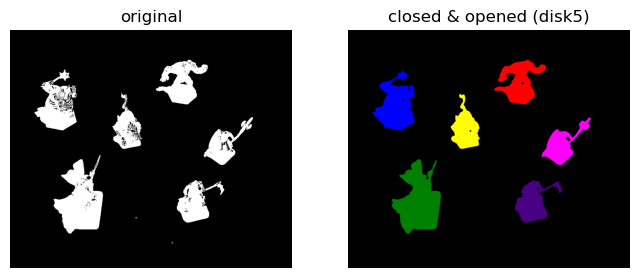

In [24]:
plot_comparison(bin_img, label2rgb(label_img), 'closed & opened (disk5)')

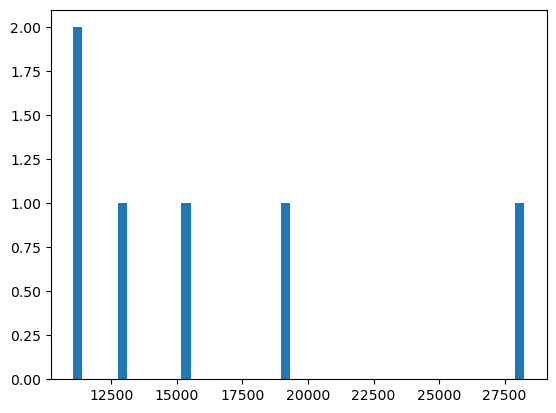

In [25]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

In [26]:
print(areas)

[15236 19207 11374 11044 28247 12928]


In [27]:
perimeters = np.array([prop.perimeter for prop in region_props])
print(perimeters)

[ 906.97474683  930.66103833  642.48232278  716.4478349  1069.86204846
  744.66608897]


In [28]:
in_dir = "data/"

im_name = "rocket.png"

im_org = io.imread(in_dir + im_name)

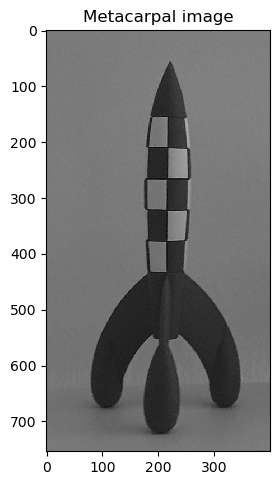

uint8


In [29]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()
print(im_org.dtype)

In [30]:
prewitt_img_gray = prewitt(im_org)

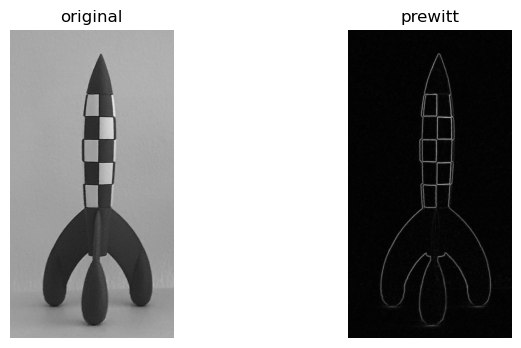

float64


In [31]:
plot_comparison(im_org, prewitt_img_gray, 'prewitt')
print(prewitt_img_gray.dtype)

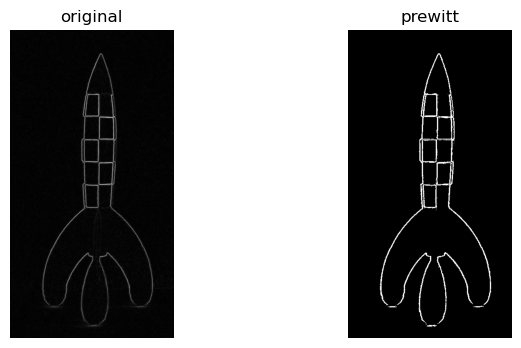

In [32]:
threshold = 0.06
bin_img = prewitt_img_gray > threshold
plot_comparison(prewitt_img_gray, bin_img, 'prewitt')

In [33]:
print(np.count_nonzero(bin_img))

8885


In [34]:
change1 = io.imread(in_dir + "change1.png")
change2 = io.imread(in_dir + "change2.png")

In [35]:
change1 = color.rgb2gray(change1)
change2 = color.rgb2gray(change2)

In [36]:
diff = abs(change2-change1)

In [37]:
changed_pixels = (diff > 0.3).sum()

In [38]:
total_pixels = change2.shape[0] * change2.shape[1]

percentage_changed = (changed_pixels / total_pixels) * 100

print(percentage_changed)

4.560539752005835


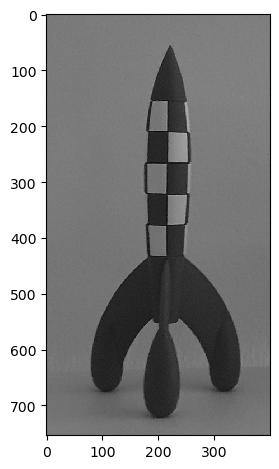

In [39]:
src_img = io.imread('data/rocket.png')
#dst_img = io.imread('data/Hand2.jpg')
#blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(src_img)
io.show()

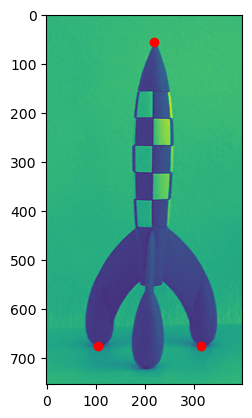

In [40]:
src = np.array([[220, 55], [105, 675], [315, 675]])
dst = np.array([[100, 165], [200, 605], [379, 525]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

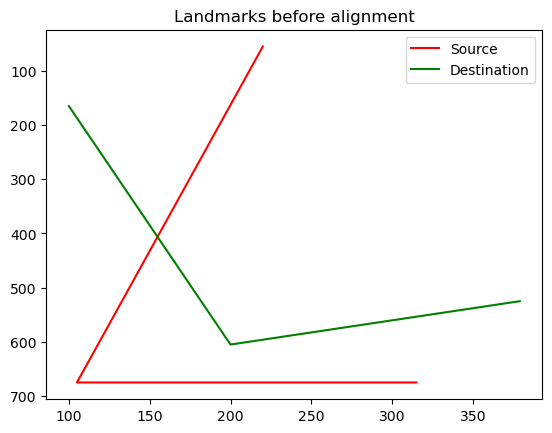

In [41]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [42]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 67021


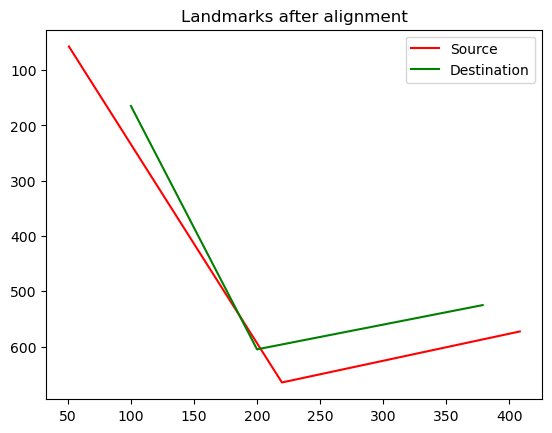

In [43]:
tform = EuclideanTransform()
tform.estimate(src, dst)

src_transform = matrix_transform(src, tform.params)

fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

In [44]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 21119.638667058513


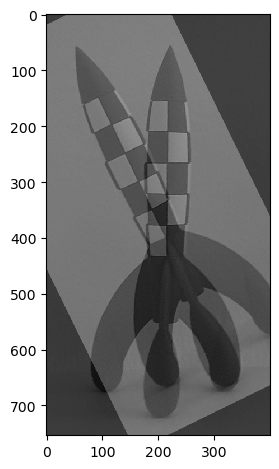

In [45]:
warped = warp(src_img, tform.inverse)
blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(src_img)
io.imshow(blend)
io.show()

In [46]:
warped = img_as_ubyte(warped)
pixel_value = warped[150, 150]

print("Pixel value at (row=150, column=150):", pixel_value)

Pixel value at (row=150, column=150): 129


In [47]:
from skimage.filters import gaussian

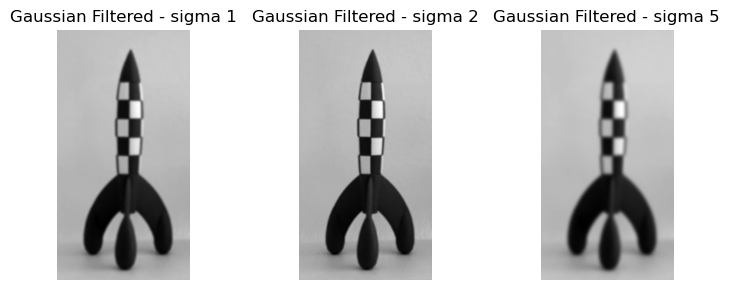

In [48]:
sigma = 2
gauss_img_2 = gaussian(src_img, sigma)
gauss_img_5 = gaussian(src_img, 5)
gauss_img_3 = gaussian(src_img, 3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 3))
ax0.imshow(gauss_img_3, cmap='gray')
ax0.set_title("Gaussian Filtered - sigma 1")
ax0.axis('off')
ax1.imshow(gauss_img_2, cmap='gray')
ax1.set_title("Gaussian Filtered - sigma 2")
ax1.axis('off')
ax2.imshow(gauss_img_5, cmap='gray')
ax2.set_title("Gaussian Filtered - sigma 5")
ax2.axis('off')

fig.tight_layout()
io.show()

In [49]:
gauss_img_3 = img_as_ubyte(gauss_img_3)
pixel_value = gauss_img_3[100, 100]

print("Pixel value at (row=150, column=150):", pixel_value)

Pixel value at (row=150, column=150): 123


In [50]:
#!python data/LDA.py

In [51]:
def lda_classification():
    pooled_cov = 2 * np.eye(2)
    group_mean = np.array([[24, 3], [30, 7]])
    x = np.array([[23], [5]])
    group_diff = group_mean[1, :] - group_mean[0, :]
    group_diff = group_diff[:, None]

    w = np.linalg.inv(pooled_cov) @ group_diff
    c = -0.5 * np.sum(group_mean, axis=0, keepdims=True)
    w0 = c @ w
    y = x.T @ w + w0
    print(y)

    pooled_cov = 2 * np.eye(2)  # or 4*np.eye(2)?
    group_mean = np.array([[24, 3], [30, 7]])
    prior_prob = [[0.5], [0.5]]
    m = 2  # n dimensions
    k = 2  # n classes
    W = np.zeros((k, m + 1))

    for i in range(k):
        # Intermediate calculation for efficiency
        temp = group_mean[i, :][np.newaxis] @ np.linalg.inv(pooled_cov)
        # Constant
        W[i, 0] = -0.5 * temp @ group_mean[i, :].T + np.log(prior_prob[i])
        # Linear
        W[i, 1:] = temp

    Y = np.array([[1, 23, 5]]) @ W.T
    posteriorProb = np.clip(np.exp(Y) / np.sum(np.exp(Y), 1)[:, np.newaxis], 0, 1)

    print(Y)
    print(posteriorProb)

In [52]:
import numpy as np

# Define the mean values for classes 1 and 2
mean1 = np.array([24, 3])
mean2 = np.array([30, 7])

# Define the covariance matrix
covariance = np.array([[2, 0], [0, 2]])

# Define the weight vector
weight = np.linalg.inv(covariance) @ (mean2 - mean1)

# Define the threshold
threshold = 0.5 * (mean1 + mean2) @ np.linalg.inv(covariance) @ (mean1 - mean2)

# Define the input data point
x = np.array([23, 5])

# Calculate yC∈2(x)
y = np.dot(x, weight) - threshold

# Determine the class
if y > 0:
    sample_class = 2
else:
    sample_class = 1

# Print the result
print("yC∈2(x) =", y)
print("Sample belongs to Class", sample_class)

yC∈2(x) = 170.0
Sample belongs to Class 2


In [53]:
import numpy as np

# Means and covariance matrix
mu1 = np.array([24, 3])
mu2 = np.array([30, 7])
cov = np.array([[2, 0], [0, 2]])

# Calculate weight vector
inv_cov = np.linalg.inv(cov)
w = np.dot(inv_cov, (mu2 - mu1))

# Calculate threshold
cw = 0.5 * np.dot(w.T, (mu1 + mu2))

# Calculate yC∈2(x) for a point
x = np.array([23, 5])
y = np.dot(x, w) - cw

# Determine the class
if y > 0:
    print(f'The sample belongs to class 2 with a value of yC∈2(x) = {y}')
else:
    print(f'The sample belongs to class 1 with a value of yC∈2(x) = {y}')

The sample belongs to class 1 with a value of yC∈2(x) = -12.0


In [54]:
lda_classification()

[[-12.]]
[[136.55685282 124.55685282]]
[[9.99993856e-01 6.14417460e-06]]


In [55]:
txt_name = "car_data.txt"
car_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = car_data[0:203, 0:8]
n_feat = x.shape[1]
n_obs = x.shape[0]

In [56]:
print(x)

[[ 88.6 168.8  64.1 ... 130.  111.   27. ]
 [ 88.6 168.8  64.1 ... 130.  111.   27. ]
 [ 94.5 171.2  65.5 ... 152.  154.   26. ]
 ...
 [109.1 188.8  68.9 ... 173.  134.   23. ]
 [109.1 188.8  68.9 ... 145.  106.   27. ]
 [109.1 188.8  68.9 ... 141.  114.   25. ]]


In [57]:
wheel_base = x[:,0]
length = x[:,1]
width = x[:,2]
height = x[:,3]
curb_weight = x[:,4]
engine_size = x[:,5]
horsepower = x[:,6]
highway_mpg = x[:,7]

In [58]:
var_wheel_base = wheel_base.var(ddof=1)
var_length = length.var(ddof=1)
var_width = width.var(ddof=1)
var_height = height.var(ddof=1)
var_curb_weight = curb_weight.var(ddof=1)
var_engine_size = engine_size.var(ddof=1)
var_horsepower = horsepower.var(ddof=1)
var_highway_mpg = highway_mpg.var(ddof=1)

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

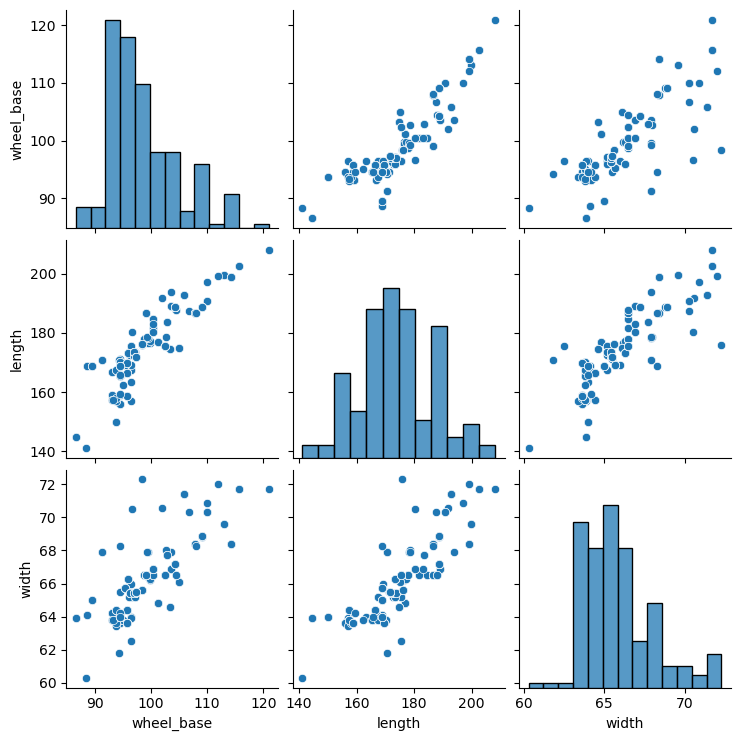

In [60]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
#d = pd.DataFrame(x, columns=['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'horsepower', 'highway_mpg'])
d = pd.DataFrame(x[:, 0:3], columns=['wheel_base', 'length', 'width'])

sns.pairplot(d)
plt.show()

In [61]:
mn = np.mean(x, axis=0)
data = x - mn
print(data[0,0])
dat = data
data = data / data.std(axis=0)
c_x = np.cov(data.T)

-10.182758620689754


<Figure size 640x480 with 0 Axes>

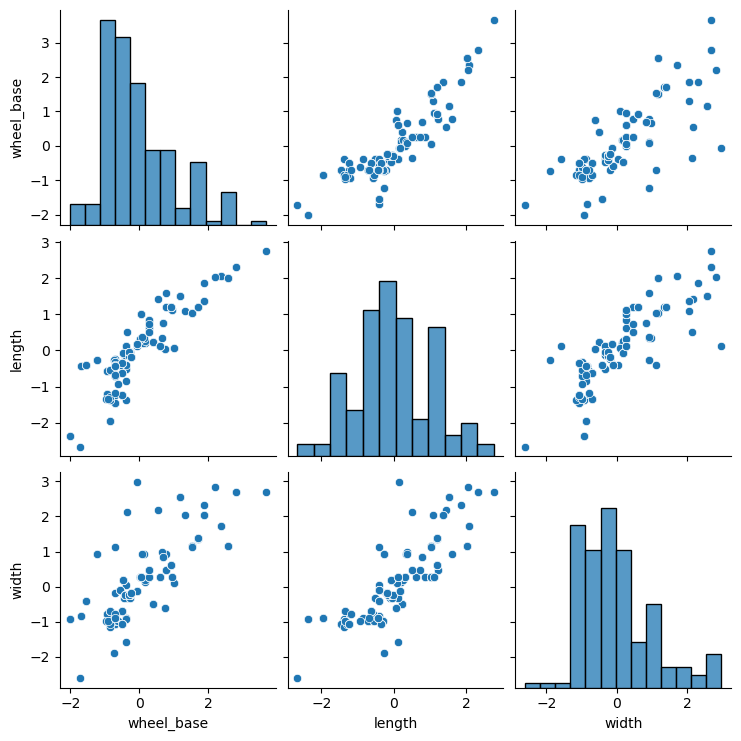

In [62]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
#d = pd.DataFrame(x, columns=['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'horsepower', 'highway_mpg'])
d = pd.DataFrame(data[:, 0:3], columns=['wheel_base', 'length', 'width'])

sns.pairplot(d)
plt.show()

In [63]:
#c_x = np.matmul(data.T,data)/(n_obs - 1)

In [64]:
values, vectors = np.linalg.eig(c_x) # Here c_x is your covariance matrix.

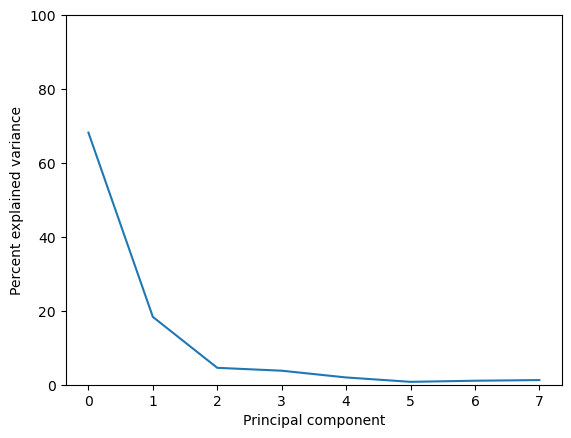

In [65]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

In [66]:
print((v_norm[0])+(v_norm[1]))

86.55230020532866


In [67]:
print(data[0,0])

-1.6884672145358348


In [71]:
pc_proj = vectors.T.dot(data.T)
print(pc_proj[0,0])

-1.1282393391042942


<Figure size 640x480 with 0 Axes>

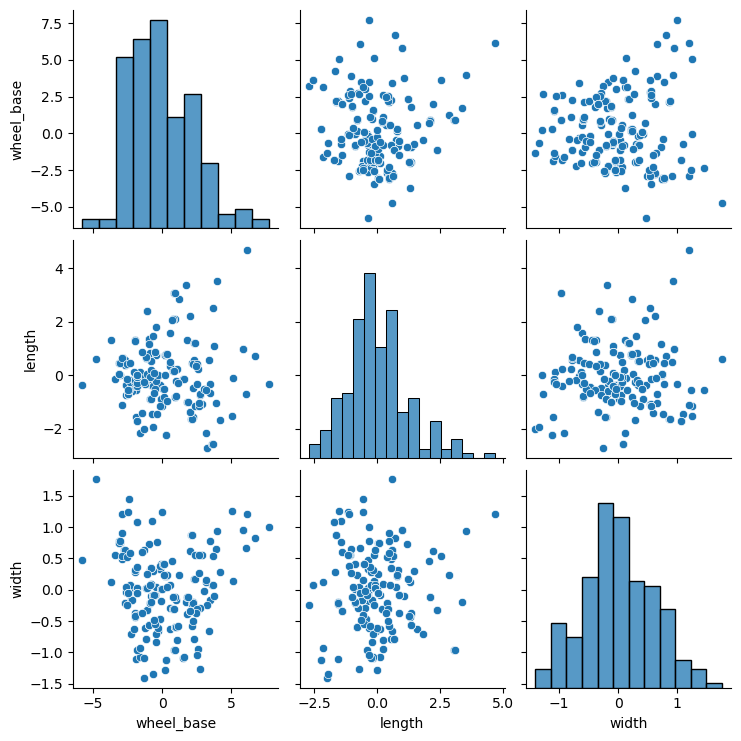

In [72]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
#d = pd.DataFrame(x, columns=['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'horsepower', 'highway_mpg'])

d = pd.DataFrame((pc_proj[0:3,:]).T, columns=['wheel_base', 'length', 'width'])

sns.pairplot(d)
plt.show()

In [78]:
import numpy as np
from scipy.stats import norm

# Given training data
cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]
sheep = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

# Fitting Gaussian distributions to the data
cows_mean, cows_std = np.mean(cows), np.std(cows)
sheep_mean, sheep_std = np.mean(sheep), np.std(sheep)

# Evaluating the PDFs at value=38
cows_pdf = norm.pdf(38, loc=cows_mean, scale=cows_std)
sheep_pdf = norm.pdf(38, loc=sheep_mean, scale=sheep_std)

print(f"PDF value for cows at value=38: {cows_pdf:.2f}")
print(f"PDF value for sheep at value=38: {sheep_pdf:.2f}")

PDF value for cows at value=38: 0.04
PDF value for sheep at value=38: 0.02


In [82]:
# Given training data
cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]
sheep = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

# Computing the threshold
threshold = (np.mean(cows) + np.mean(sheep)) / 2

print(f"Threshold value: {threshold:.1f}")

Threshold value: 41.2


In [83]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

In [84]:
ct = dicom.read_file(in_dir + '1-162.dcm')
img = ct.pixel_array

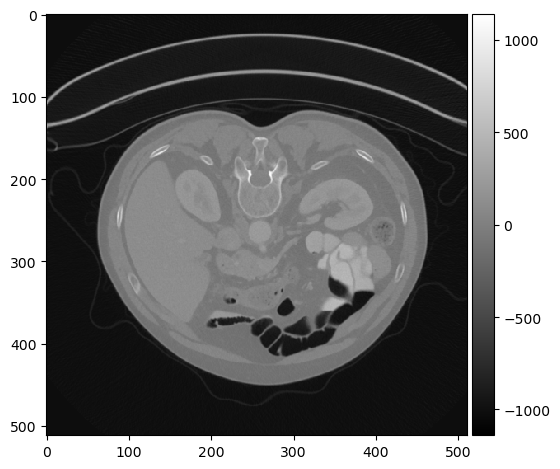

In [85]:
io.imshow(img, cmap='gray')
io.show()

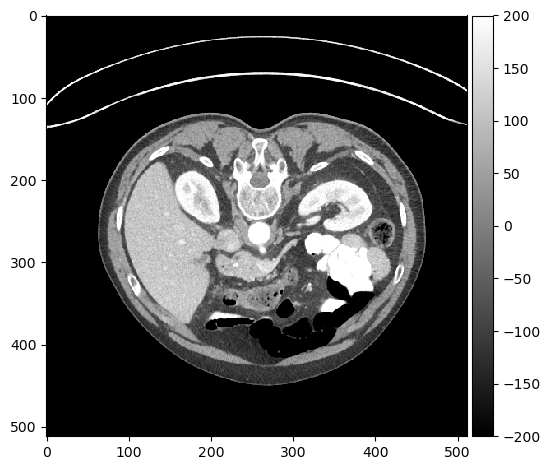

In [86]:
minimum = np.min(img)
maximum = np.max(img)
io.imshow(img, vmin=-200, vmax=200, cmap='gray')
io.show()

In [87]:
liver_roi = io.imread(in_dir + 'LiverROI.png')
kidney_roi = io.imread(in_dir + 'KidneyROI.png')
aorta_roi = io.imread(in_dir + 'AortaROI.png')
# convert to boolean image

liver_mask = liver_roi > 0
liver_values = img[liver_mask]
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]
aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]

In [88]:
t_background = -200
t_fat_soft = (mu_fat+mu_kidney)/2
t_soft_bone = (mu_spleen+mu_bone)/2
#t_soft_bone = 300

background_img = (img < t_background)
fat_img = (img > t_background) & (img <= t_fat_soft)
soft_img = (img > t_fat_soft) & (img <= t_soft_bone)
bone_img = (img > t_soft_bone)

NameError: name 'mu_fat' is not defined

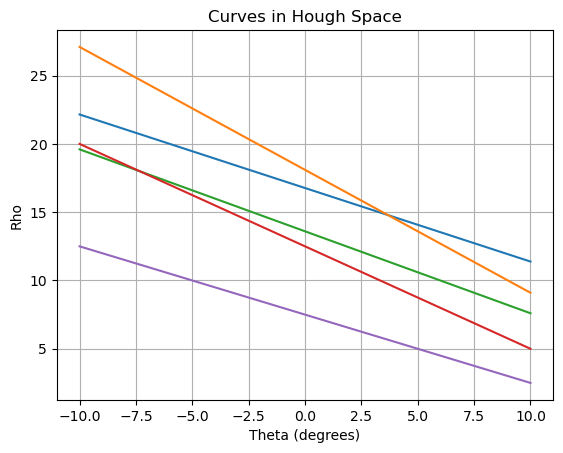

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Data points in Cartesian coordinates
data_points = [(7, 13), (9, 10), (6, 10), (6, 8), (3, 6)]

# Convert data points to polar coordinates
polar_points = []
for x, y in data_points:
    rho = np.sqrt(x**2 + y**2)
    theta = np.degrees(np.arctan2(y, x))
    polar_points.append((rho, theta))

# Plotting the curves in Hough space
fig, ax = plt.subplots()
for rho, theta in polar_points:
    theta_rad = np.radians(theta)
    x = np.linspace(-10, 10, 100)
    y = (rho - x * np.cos(theta_rad)) / np.sin(theta_rad)
    ax.plot(x, y)

ax.set_xlabel('Theta (degrees)')
ax.set_ylabel('Rho')
ax.set_title('Curves in Hough Space')

plt.grid(True)
plt.show()